<a href="https://colab.research.google.com/github/vyolete/COVID-19-Colombia/blob/master/covdate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de serie tiempo Coronavirus Colombia

El virus se diò a conocer el 17 de noviembre de 2019, este virus de nombre popular llamado Coronavirus (Davidson, 2020) en la ciudad de Wuban en China, desde ese momento el virus ha comenzado a extenderse alrededor del mundo, su crecimiento ha sido de forma exponencial y ha afectado a mas de 150 paises desde ese momento.

En Colombia el primer caso de contagio del coronavirus se detectó el 6 de marzo de 2020, y se empieza un proceso de prevencion segun los protocolos establecidos por (INS, 2020) del Cov-19.

A hoy  5 de abril se conoce que tenemos mas de 1400 casos confirmados en Colombia, en los cuales la Ciudad de Bogotá reporta el peso mas significativo de contagios correspondiente a un 50% de los infectados en el país, de alli le siguen la ciudad de Cali con 10%, los demas contagiados se distribuyen en las diferentes ciudades del país, esta informacion hace sentido por ser Bogotá la capital y  por su alto flujo que tiene de extrajeros.

Este documento tiene como objetivo brindar informacion inicial, mediante analisis basicos preliminares enfocado a la analitica de datos con el fin de, conocer su expansion en el país, y determinar el comportamiento del virus y su relación con las variables básicas como es el sexo, la edad y origen, según los datos sumistrados por el Instituto Nacional de salud.

In [2]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dfuribez/COVID-19-Colombia/master/dataset.csv', parse_dates=['fecha'])
df.head()

# Draw Plot


,id,fecha,ciudad,departamento,atencion,edad,sexo,caso,origen
0,1,2020-06-03,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia
1,2,2020-09-03,Buga,Valle del Cauca,Recuperado,34,M,Importado,España
2,3,2020-09-03,Medellín,Antioquia,Recuperado,50,F,Importado,España
3,4,2020-11-03,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia
4,5,2020-11-03,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia


In [3]:
# Procesamiento de variables
df["ciudad"] = df["ciudad"].astype("category")
df["departamento"] = df["departamento"].astype("category")
df["atencion"] = df["atencion"].astype("category")
df["sexo"] = df["sexo"].astype("category")
df["edad"] = df["edad"].astype("category")
df["caso"] = df["caso"].astype("category")
df["origen"] = df["origen"].astype("category")
df.dtypes

id                       int64
fecha           datetime64[ns]
ciudad                category
departamento          category
atencion              category
edad                  category
sexo                  category
caso                  category
origen                category
dtype: object

In [81]:
df.shape

(1406, 10)

# Análisis de tipo corte transversal

A continuacion se presentan las estadisticas básicas descritivas, en relacio al número de personas contagiadas por el Cov_19 en Colombia, tomandocon base la serie diaria que publiuca el INS desde el 6 marzo a hoy.

Acorde a la información recopilada sobre las fechas y las caracteristicas de los contagiados, se realiza un analisis de los atributos recopilados con el objeto de brindar informacion sobre el comportamiento del contagio del virus.

In [202]:
#Conteo por departamento

df.departamento.value_counts()

Bogotá D.C.              695
Valle del Cauca          178
Antioquia                150
Cundinamarca              47
Barranquilla D.E.         42
Cartagena D.T. y C        42
Risaralda                 37
Huila                     34
Norte de Santander        25
Quindío                   23
Cesar                     16
Caldas                    16
Tolima                    15
Meta                      13
Boyacá                    13
Santa Marta D.T. y C.     12
Santander                 12
Cauca                     12
Nariño                     6
Atlántico                  5
Córdoba                    3
Bolívar                    3
Casanare                   2
San Andrés                 2
La Guajira                 1
Sucre                      1
Valle del cauca            1
Name: departamento, dtype: int64

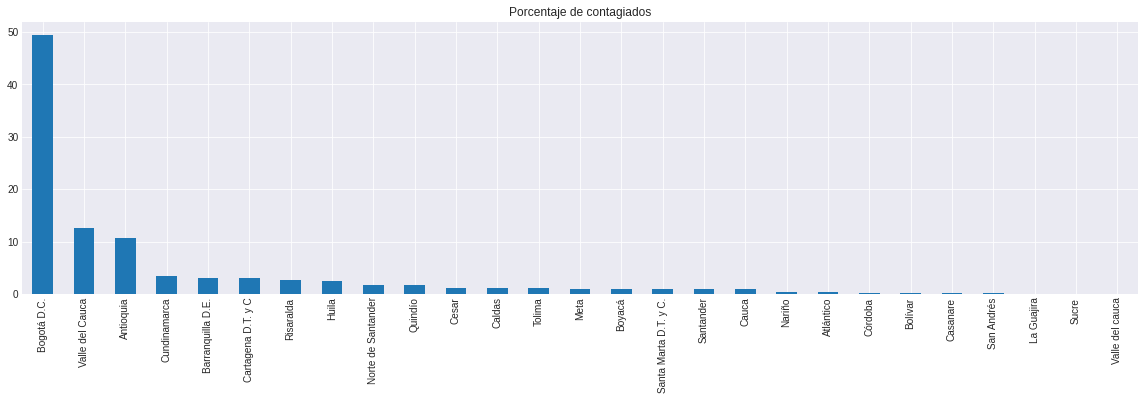

In [204]:
#grafica de procentaje por departamento

# gráfico de barras de frecuencias relativas. de el porcentaje de contagiados segun el caso de contagio
plot = (100 * df['departamento'].value_counts() / len(df['departamento'])).plot(
kind='bar', title='Porcentaje de contagiados',figsize=(20,5))

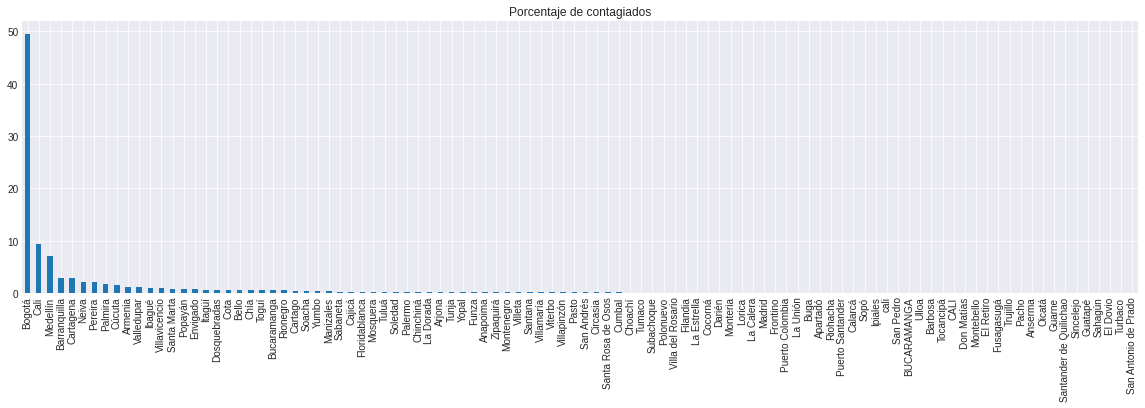

In [68]:
#grafica de procentaje por ciudades

# gráfico de barras de frecuencias relativas. de el porcentaje de contagiados segun el caso de contagio
plot = (100 * df['ciudad'].value_counts() / len(df['ciudad'])).plot(
kind='bar', title='Porcentaje de contagiados',figsize=(20,5))

Podemos observar que el 50% de los contagiados se encuentran en la ciudad de bogotá, y le siguen 10 % cali y 8% medellin, esta informacion puede variar segun los dìas y casos reportados diarios

In [13]:
#Conteo por Atencion

df.atencion.value_counts()

Casa            1115
Hospital         117
Recuperado        85
Hospital Uci      57
Fallecido         32
Name: atencion, dtype: int64

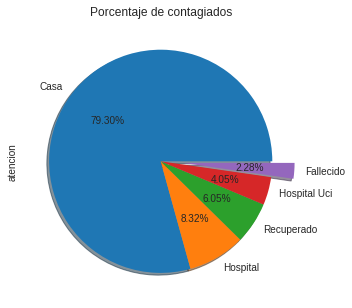

In [170]:
# Distribucion de contagiados según su atencion
explode = (0, 0, 0, 0,0.2) 
plot = (100 * df['atencion'].value_counts() / len(df['atencion'])).plot(
kind='pie', title='Porcentaje de contagiados',autopct='%.2f%%',figsize=(5,7),explode=explode,shadow=True)

La grafica de propocion de atencion, nos indica que aprox el 79.30% de las personas que estan contagiadas se encuentran en casa y de las persona reportadas como contagiadas han fallecido 2.28%

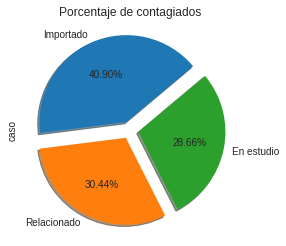

In [137]:
# gráfico de porcentaje de contagiados según el caso de contagio
explode2 = (0.1, 0.1, 0.1)
plot = (100 * df['caso'].value_counts() / len(df['caso'])).plot(
kind='pie', autopct='%.2f%%', title='Porcentaje de contagiados',explode=explode2,shadow=True, startangle=40)

Se percibe que mas del 40% de los casos de contagio son por personas que llegaron del extrajero. y un 30 % de los casos hacen referencia a personas que se han contagiado por contacto


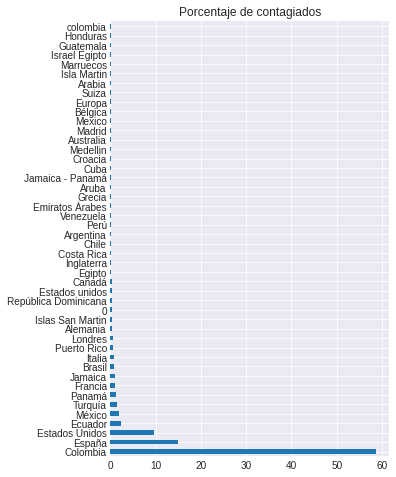

In [62]:
# gráfico de barras de frecuencias relativas. de el porcentaje de contagiados
plot = (100 * df['origen'].value_counts() / len(df['origen'])).plot(
kind='barh', title='Porcentaje de contagiados', figsize=(5,8))

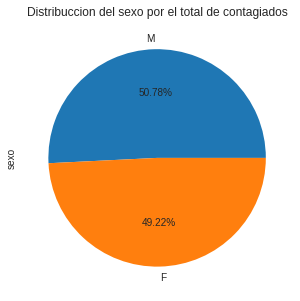

In [132]:
# Distribucion de contagiados segun el sexo
plot = (100 * df['sexo'].value_counts() / len(df['sexo'])).plot(
kind='pie', autopct='%.2f%%', title='Distribuccion del sexo por el total de contagiados', figsize=(5,5))

En relacion al sexo, se observa una distribucion similar de contagio tanto en hombres como mujeres

In [72]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['atencion'], columns=df['sexo'],
            margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

sexo,F,M,All
atencion,,,
Casa,40.256046,39.046942,79.302987
Fallecido,0.924609,1.351351,2.275960
Hospital,3.058321,5.263158,8.321479
Hospital Uci,1.351351,2.702703,4.054054
Recuperado,3.627312,2.418208,6.045519
All,49.217639,50.782361,100.000000


Esta tabla indica que solo el 6% de las personas contagiadas se han recuperado y este 6% esta compuesto por 3.6% mujeres y 2.5% de hombres, no hay mayor diferencia en la variable sexo.

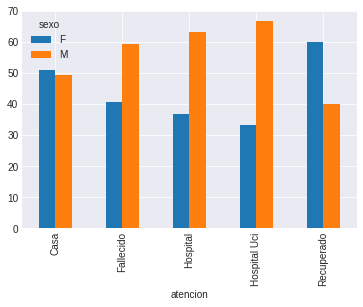

In [73]:
# Gráfico de barras de sexo segun atencion
plot = pd.crosstab(index=df['atencion'],
            columns=df['sexo']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Sin embargo, los datos nos indica que 60% de las personas muertas por coronavirus son hombres y de las personas recuperadas el 60% de las personas son mujeres

In [0]:
#Analisis de contagiados por edad

bins=[0,9,19,29,39,49,59,69,79,89]

names=["1","2","3","4","5","6","7","8","9"]

df["rango"]=pd.cut(df["edad"],bins,right=False)

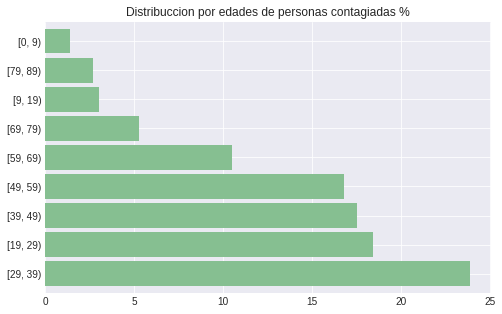

In [192]:
# Distribucion por edades de personas Contagiadas
plot = (100 * df['rango'].value_counts() / len(df['rango'])).plot(
kind='barh', title='Distribuccion por edades de personas contagiadas %',figsize=(8, 5), color='#86bf91', zorder=2, width=0.85)

Podemos observar que el grupo con menor nivel de contacto son los niños de edades entre 0 y 9 años 3% y le siguen las personas mayores entre las edades de 79 a 89 años 4%, sin embargo, se observa que el virus esta contagiano a todos los rangos de edades, es importante destacar que el grupo de personas con mayoria de edad no está dentro de los principales grupos afectados, el mayor porcentaje se concentra en personas entre los 29 y 39 años de edad con 23%, aunque se tiene 11% de personas contagiadas que estan comenzando la tercera edad y segun los reportes este grupo de personas tienden a tener mas riesgo y pueden comprometer su vida

In [182]:
# revision de variables

pd.get_dummies(df.sexo).head(1)

,F,M
0,1,0


In [181]:
# Correlacion de las variables

correlacion= df.corr(method="pearson")

print(correlacion)

            id      edad
id    1.000000  0.017654
edad  0.017654  1.000000


## Serie de tiempo 

El comportamiendo del número de personas contagiadas por día  se representa en las siguientes graficas según los datos recopilados del INS (2020)

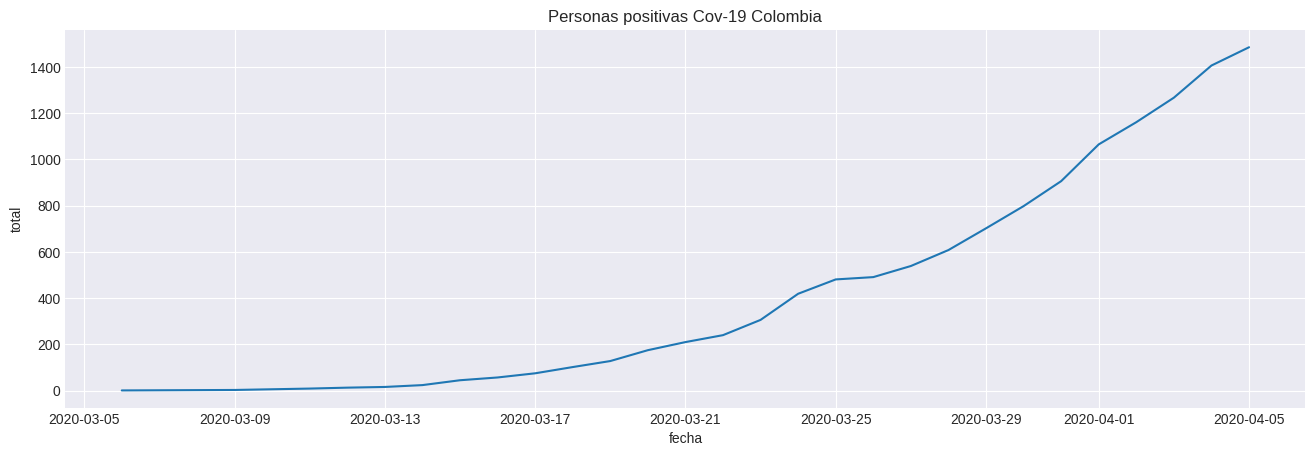

In [183]:
import matplotlib.pyplot as plt


ds = pd.read_csv('https://raw.githubusercontent.com/dfuribez/COVID-19-Colombia/master/time_series.csv', parse_dates=['fecha'],index_col='fecha')
ds.head()
# Draw Plot
def plot_ds(df, x, y, title="", xlabel='fecha', ylabel='total', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_ds(ds, x=ds.index, y=ds.total, title='Personas positivas Cov-19 Colombia') 

In [104]:
ds.describe()

,total,dia,casos_nuevos,casos_activos,recuperados,muertes
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,446.275862,16.310345,52.413793,423.965517,15.137931,7.172414
std,465.267427,8.332824,45.308086,432.488520,25.076631,9.993101
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,57.000000,10.000000,12.000000,56.000000,1.000000,0.000000
50%,240.000000,16.000000,35.000000,234.000000,3.000000,3.000000
75%,702.000000,23.000000,94.000000,681.000000,10.000000,11.000000
max,1485.000000,30.000000,159.000000,1362.000000,88.000000,35.000000


In [0]:
ds.dtypes

total            int64
dia              int64
casos_nuevos     int64
casos_activos    int64
recuperados      int64
muertes          int64
dtype: object

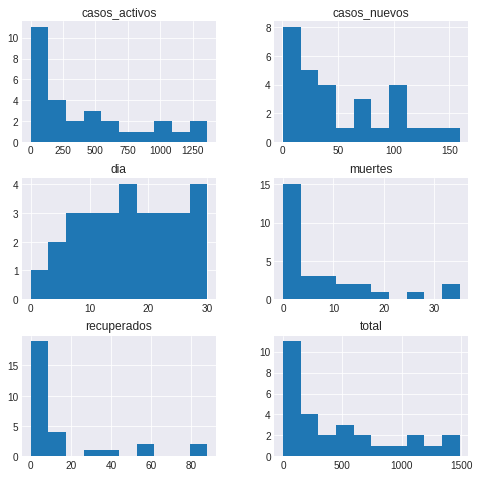

In [184]:
#histograma

ds.hist(figsize=(8,8))
plt.show()

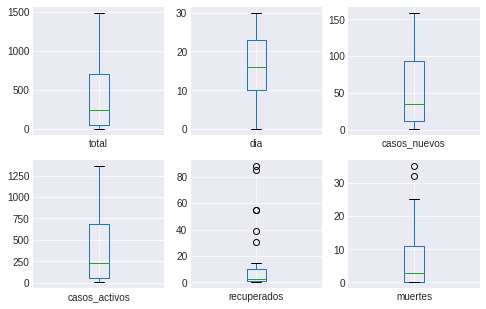

In [185]:
# Diagrama de bigotes

ds.plot(kind="box", subplots=True, layout=(3,3),sharex=False,sharey=False, figsize=(8,8))
plt.show()

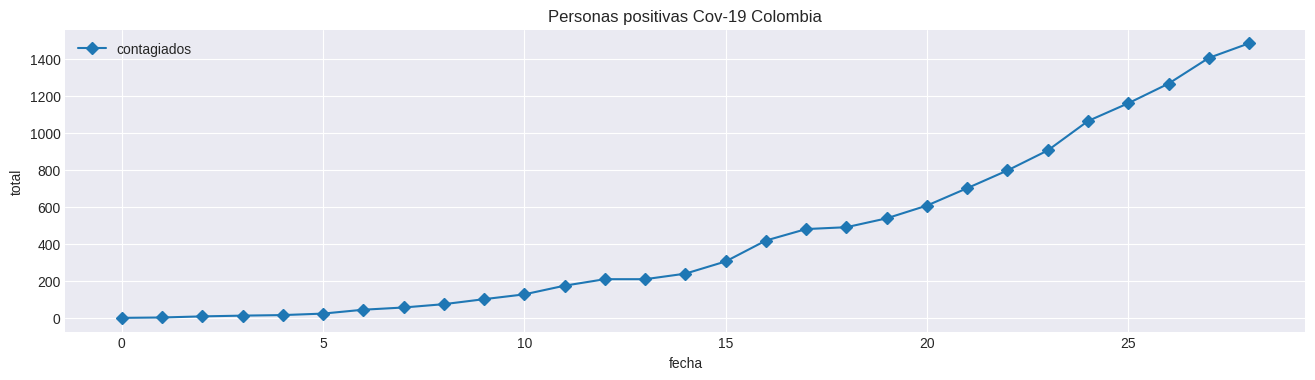

In [94]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt


dw = pd.read_csv('https://raw.githubusercontent.com/dfuribez/COVID-19-Colombia/master/time_series.csv', parse_dates=['fecha'])
dw.head()
# Draw Plot
def plot_dw(df, x, y, title="", xlabel='fecha', ylabel='total', dpi=100):
    plt.figure(figsize=(16,4), dpi=dpi)
    plt.plot(x, y, color='tab:blue', marker="D", label= "contagiados")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

plot_dw(dw, x=dw.index, y=dw.total, title='Personas positivas Cov-19 Colombia') 

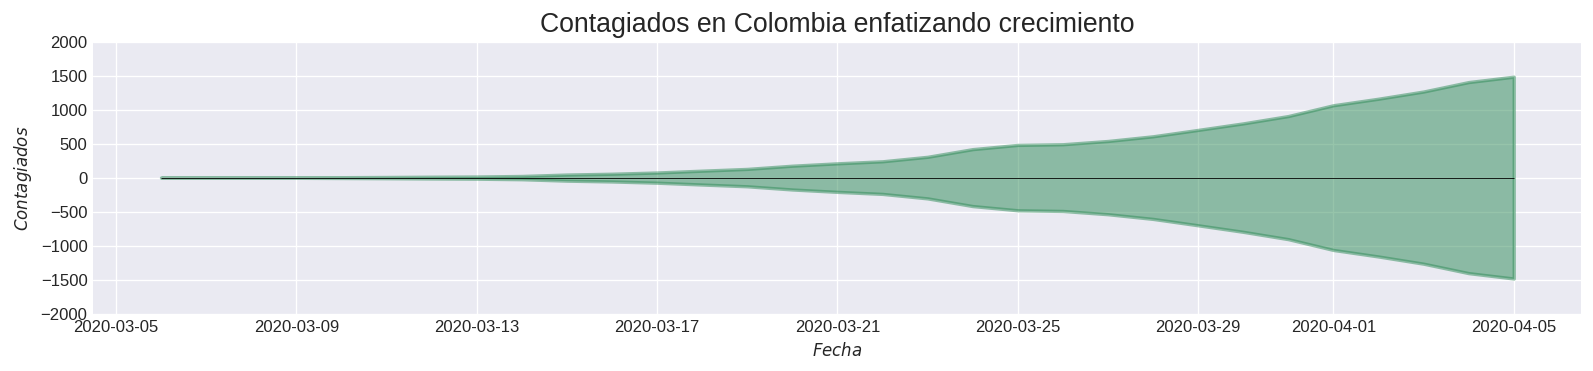

In [96]:
# Enfatizar el crecimiento

x=dw["fecha"].values
y1=dw["total"].values
fig, ax = plt.subplots(1, 1, figsize=(16,3), dpi= 120)
plt.gca().set(ylabel='$Contagiados$', xlabel='$Fecha$')
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-2000, 2000)
plt.title('Contagiados en Colombia enfatizando crecimiento', fontsize=16)
plt.hlines(y=0, xmin=np.min(dw.fecha), xmax=np.max(dw.fecha), linewidth=.5)
plt.show()

La grafica indica que todos los valores son positivos, se pueden mostrar esto en ambos lados del eje Y para enfatizar el cremiento

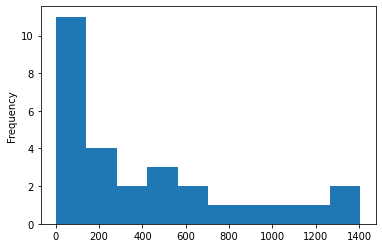

In [28]:
dw.total.plot(kind='hist')

In [0]:
La gráfica indica una tendencia de  crecimiento a medida que aumentan los días

In [0]:
 
# desplazando el 1 dia el valor de cierre
desplazado = dw['total'].shift(1)
desplazado[:5]

0     NaN
1     1.0
2     3.0
3     9.0
4    13.0
Name: total, dtype: float64

In [158]:
#e calula el porcentaje de variacion diaria

dw["total"].pct_change()[:5]

porc_vari_diria=dw["total"].pct_change()[:5]

variacion_diaria2 = dw['casos_nuevos'].shift(1)/dw['casos_nuevos'] 
dw['var_diaria2'] = variacion_diaria2
dw['var_diaria2'][:5]

0         NaN
1    0.500000
2    0.333333
3    1.500000
4    1.333333
Name: var_diaria2, dtype: float64

In [159]:
dw.head()

,fecha,total,dia,casos_nuevos,casos_activos,recuperados,muertes,var_diaria2,var_diaria,tend,pronostico
0,2020-03-06,1,0,1,1,0,0,NaN,NaN,-7.761331,NaN
1,2020-03-09,3,3,2,3,0,0,0.500000,2.000000,-3.924577,0.547006
2,2020-03-11,9,5,6,9,0,0,0.333333,2.000000,-0.082347,1.779224
3,2020-03-12,13,6,4,13,0,0,1.500000,0.444444,3.774538,1.779224
4,2020-03-13,16,7,3,16,0,0,1.333333,0.230769,7.659057,0.460028


Text(0.5, 1.0, 'Varianza diaria')

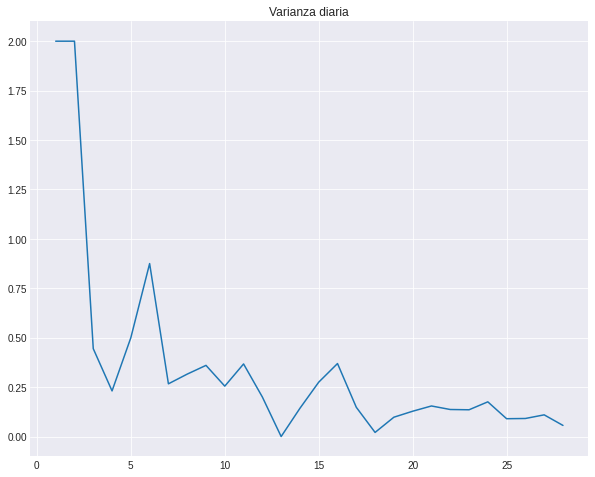

In [145]:
# calculando el porcentaje de variación del día con variable total de contagiados
variacion_diaria = dw['total'] / dw['total'].shift(1) - 1
dw['var_diaria'] = variacion_diaria
dw['var_diaria'][:5]
#  rendimiento diario
plot = dw['var_diaria'].plot(figsize=(10, 8))
plt.title("Varianza diaria")

In [0]:
import numpy as np
import pandas as pd

import datetime as dt

import statsmodels.api as sm 

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 


# graficos incrustados
%matplotlib inline

# pandas solo 4 decimales
#pd.set_option('precision', 4)
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
dw_ciclo ,dw_tend = sm.tsa.filters.hpfilter(dw['casos_nuevos'])
dw['tend'] = dw_tend

[Text(0, 0.5, '$Contagiados-por-día$'), Text(0.5, 0, '$tiempo$')]

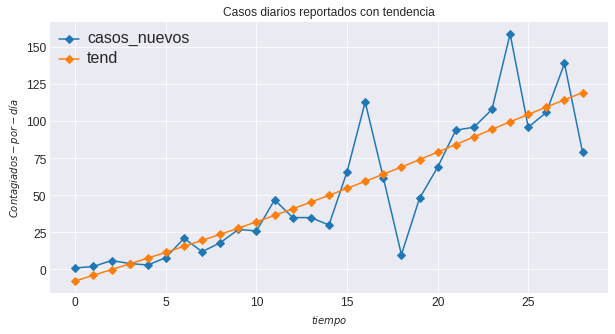

In [165]:
# graficando la variacion de los contagiados  con la tendencia.
dw[['casos_nuevos', 'tend']].plot(figsize=(10, 5), fontsize=12,marker="D");
legend = plt.legend()
legend.prop.set_size(16);
plt.title("Casos diarios reportados con tendencia")
plt.gca().set(ylabel='$Contagiados-por-día$', xlabel='$tiempo$')

Se observa un proceso creciente de la serie de tiempo a lo largo de los dia en los que se registra la informacion

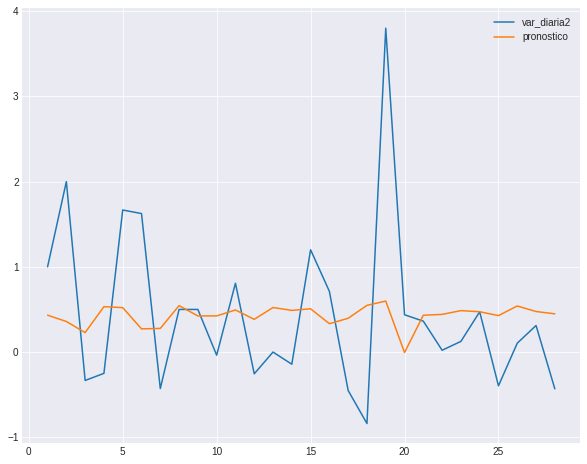

In [161]:

# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(dw['var_diaria2'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
dw['pronostico'] = resultados.fittedvalues  
plot = dw[['var_diaria2', 'pronostico']].plot(figsize=(10, 8))

Funcion exponencial: la tasa de crecimiento, su derivada, es directamente proporcional al valor de la funcion.

Funcion del tiempo: 

C = n^t crecimiento exponencial


la cantidad c se dobla en la cantidad tiempo

c= cantidad

n 

tiempo

tasa de infeccion y la tasa de recuperacion


modelo

personas subsetibles

infectados  d/dt = b.S.I-r.I

recuperados

In [162]:
dw

,fecha,total,dia,casos_nuevos,casos_activos,recuperados,muertes,var_diaria2,var_diaria,tend,pronostico
0,2020-03-06,1,0,1,1,0,0,NaN,NaN,-7.761331,NaN
1,2020-03-09,3,3,2,3,0,0,1.000000,2.000000,-3.924577,0.432659
2,2020-03-11,9,5,6,9,0,0,2.000000,2.000000,-0.082347,0.358791
3,2020-03-12,13,6,4,13,0,0,-0.333333,0.444444,3.774538,0.228589
4,2020-03-13,16,7,3,16,0,0,-0.250000,0.230769,7.659057,0.532393
5,2020-03-14,24,8,8,24,0,0,1.666667,0.500000,11.584332,0.521543
6,2020-03-15,45,9,21,45,0,0,1.625000,0.875000,15.560572,0.271990
7,2020-03-16,57,10,12,56,1,0,-0.428571,0.266667,19.595746,0.277415
8,2020-03-17,75,11,18,74,1,0,0.500000,0.315789,23.701222,0.544793
9,2020-03-18,102,12,27,101,1,0,0.500000,0.360000,27.883622,0.423891


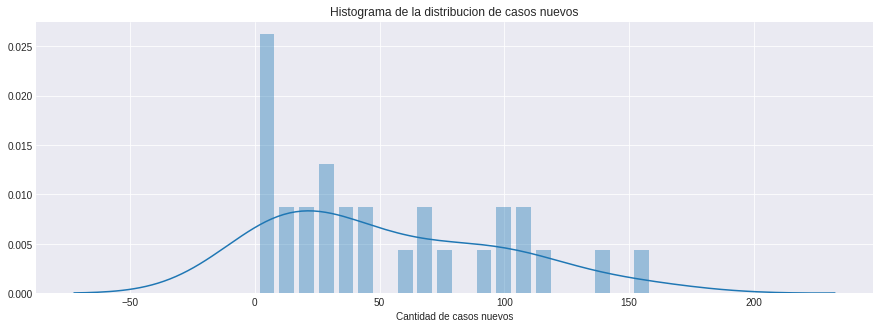

In [166]:


import seaborn as sns
def hist_sea(y):
    plt.figure(figsize=(15,5))
    ax = plt.subplot(1,1,1)
    ax.set_title('Histograma de la distribucion de casos nuevos')
    sns.distplot(y,bins=20, hist_kws={"rwidth":0.75},hist = True,ax=ax)
    ax.set_xlabel('Cantidad de casos nuevos')
    
    return ax

plt.style.use('seaborn-darkgrid')
y = dw["casos_nuevos"]
ax = hist_sea(y)
plt.show()